In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

##  Importing Dataset

In [130]:
data = pd.read_csv('AB_NYC_2019.csv')

In [131]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [132]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### `Q1` What is the average price of listings in each neighborhood group?

In [134]:
avg_price = data.groupby('neighbourhood_group')['price'].mean()
avg_price

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

<Axes: ylabel='neighbourhood_group'>

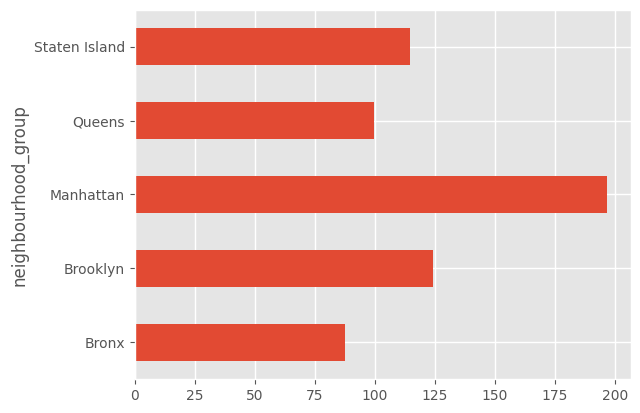

In [135]:
avg_price.plot(kind = 'barh')

#### `Q2`What is the most common room type available?

<Axes: ylabel='count'>

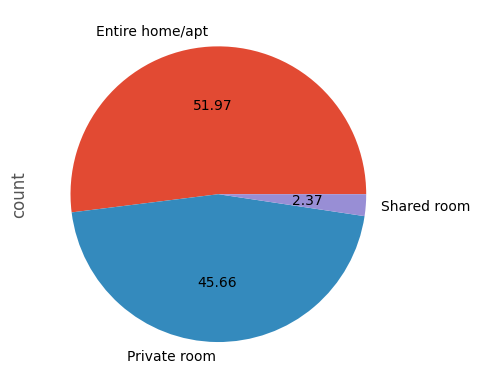

In [136]:
data['room_type'].value_counts().plot(kind = 'pie',stacked = True, autopct='%.2f')

#### `Q3` What is the average number of minimum nights required for a booking?

<Axes: ylabel='neighbourhood_group'>

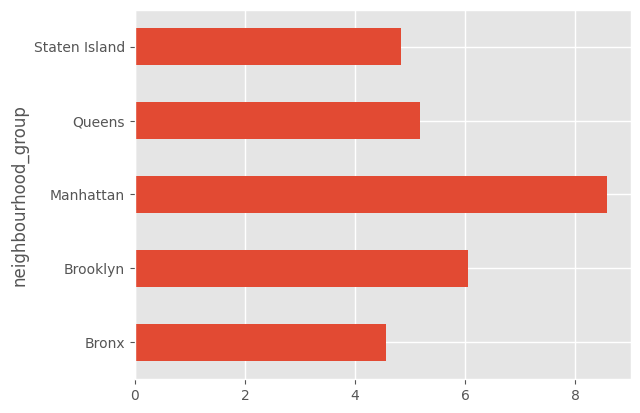

In [137]:
data.groupby('neighbourhood_group')['minimum_nights'].mean().plot(kind = 'barh',stacked = True)

#### `Q4` How many unique hosts are there in the dataset?

In [138]:
data['host_name'].unique().shape[0]

11453

In [139]:
# top 5 hosts
data['host_name'].value_counts(ascending = False).head().reset_index()

,host_name,count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279


In [140]:
# top 5 hosts based on neighbourhood_group
top_hosts = data.groupby(['neighbourhood_group', 'host_name']).size().reset_index(name='listing_count')
top_hosts = top_hosts.sort_values(['neighbourhood_group', 'listing_count'], ascending=[True, False])
top_hosts = top_hosts.groupby('neighbourhood_group').head(5)

top_hosts

,neighbourhood_group,host_name,listing_count
612,Bronx,Vie,13
56,Bronx,Armando,10
97,Bronx,Carol,9
465,Bronx,Orit,9
111,Bronx,Charles,8
4544,Brooklyn,Michael,159
1942,Brooklyn,David,142
5649,Brooklyn,Sarah,133
809,Brooklyn,Alex,122
4507,Brooklyn,Melissa,105


#### `Q5`Which neighborhood has the highest average price for listings?

In [141]:
 data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).reset_index().head(1)

,neighbourhood_group,price
0,Manhattan,196.875814


#### `Q6` What is the correlation between price and the number of reviews per month?

In [142]:
correlation = data['price'].corr(data['reviews_per_month'])
correlation

-0.030608348567533115

#### `Q7` How many listings have never been reviewed?

In [143]:
data[data['reviews_per_month'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


#### `Q8` What is the distribution of room types within each neighborhood group?

In [152]:
distribution = data.groupby(['neighbourhood_group','room_type']).size().unstack()
distribution

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


<Axes: xlabel='neighbourhood_group'>

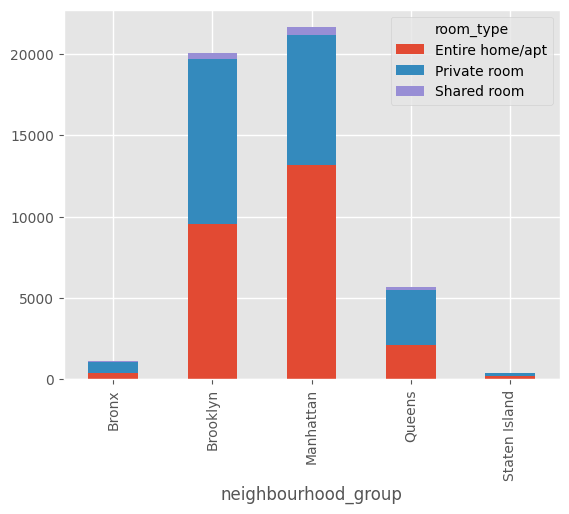

In [145]:
data.groupby(['neighbourhood_group','room_type']).size().unstack().plot(kind = 'bar',stacked = True)

#### `Q9` Which hosts have the highest total number of listings?

In [146]:
data['host_name'].value_counts().reset_index().head(1)

,host_name,count
0,Michael,417


#### `Q10` What is the percentage of listings that are available for more than 180 days in a year?

In [147]:
# Count the number of listings available for more than 180 days
listings_available_more_than_180_days = len(data[data['availability_365'] > 180])

# Calculate the total number of listings
total_listings = len(data)

# Calculate the percentage
percentage_available_more_than_180_days = (listings_available_more_than_180_days / total_listings) * 100
percentage_available_more_than_180_days


29.377236936292057

#### `Q11` : WHich host has maximum number of properties listed?

In [180]:
max_host_id = data['host_id'].value_counts().idxmax()

# Finding corresponding host name
data[data['host_id'] == max_host_id]['host_name'].iloc[0]


'Sonder (NYC)'

In [148]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### `Q-12` Which host has maximum properties listed in neighbourhood groups having maximum properties listed ?

In [214]:
# Group the data by 'neighbourhood_group' and 'host_name', and count the occurrences
host_properties_count = data.groupby(['neighbourhood_group', 'host_name']).size()

# Find the index of the maximum count within each neighbourhood group
max_hosts_indices = host_properties_count.groupby(level=0).idxmax()

# Retrieve the host name corresponding to the maximum count indices
max_hosts = host_properties_count.loc[max_hosts_indices].reset_index()

# Rename the count column
max_hosts.rename(columns={0: 'max_properties_count'}, inplace=True)

print(max_hosts)


  neighbourhood_group     host_name  max_properties_count
0               Bronx           Vie                    13
1            Brooklyn       Michael                   159
2           Manhattan  Sonder (NYC)                   327
3              Queens        Kazuya                    79
4       Staten Island         Maria                     9


#### What may be the reason of having high price in that neighbourhood groups ?

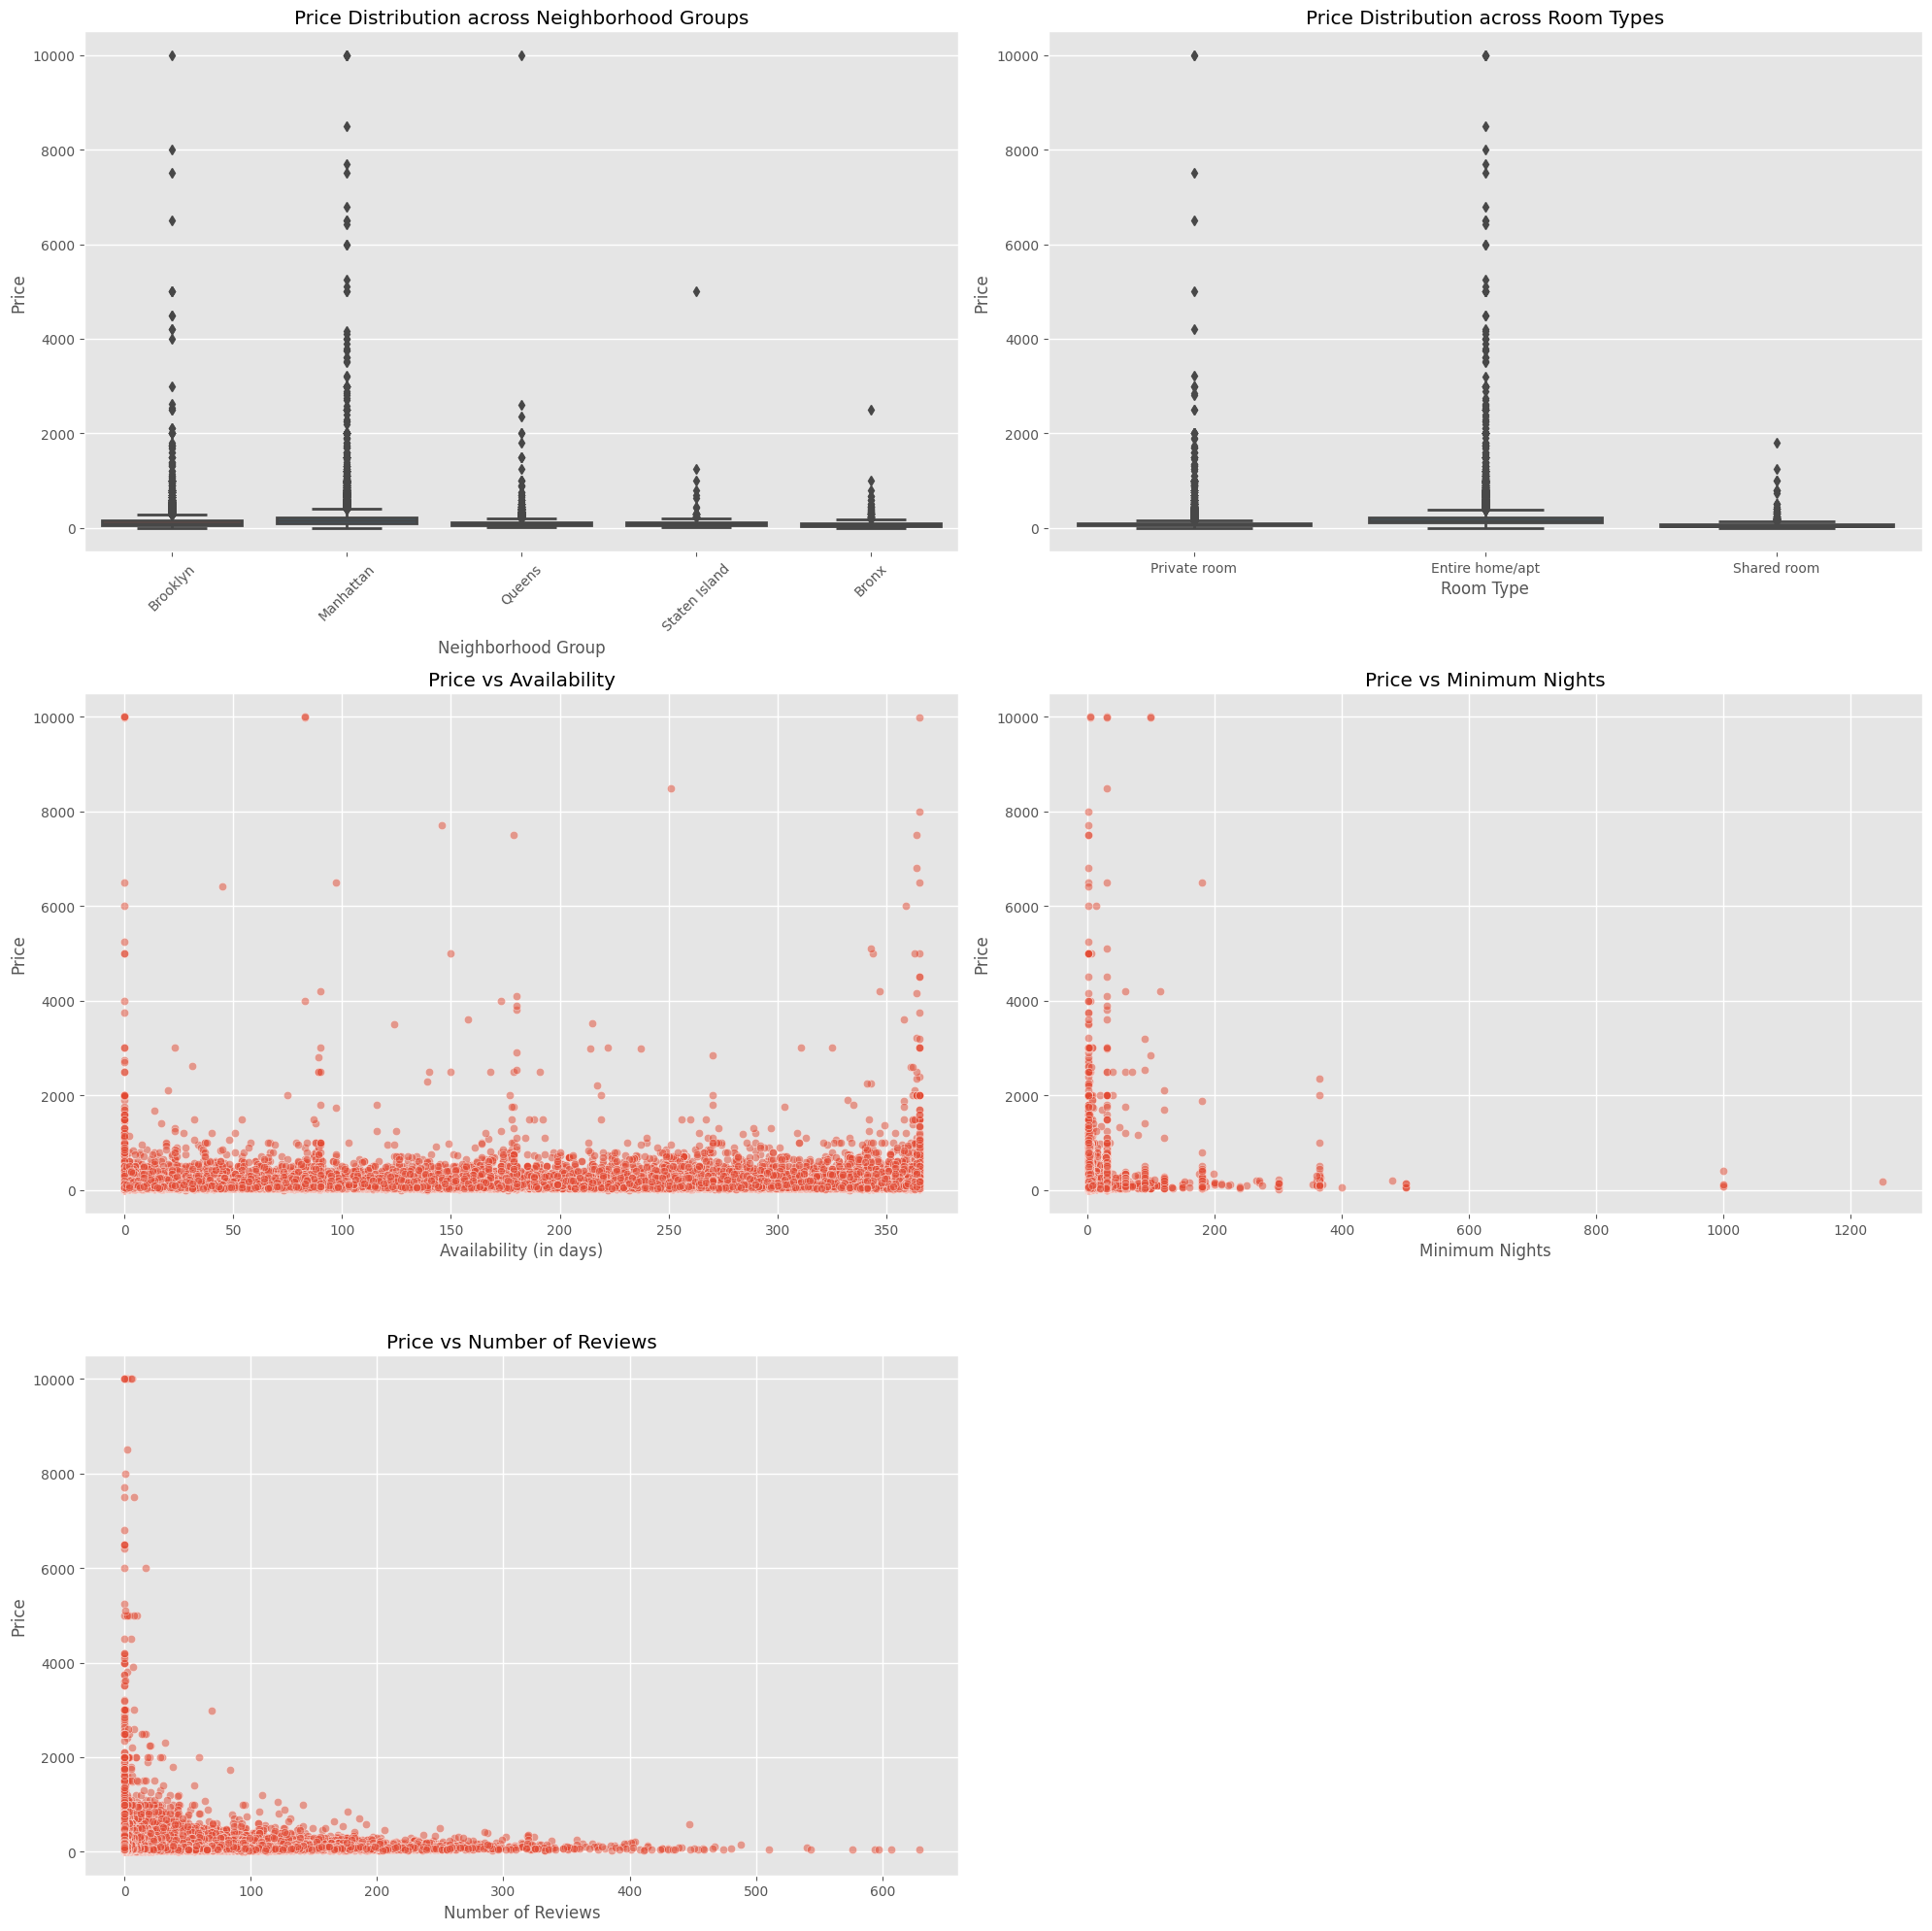

In [225]:
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

# Relationship between price and neighborhood group
sns.boxplot(data=data, x='neighbourhood_group', y='price', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution across Neighborhood Groups')
axes[0, 0].set_xlabel('Neighborhood Group')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=45)

# Relationship between price and room type
sns.boxplot(data=data, x='room_type', y='price', ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution across Room Types')
axes[0, 1].set_xlabel('Room Type')
axes[0, 1].set_ylabel('Price')

# Relationship between price and availability
sns.scatterplot(data=data, x='availability_365', y='price', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Availability')
axes[1, 0].set_xlabel('Availability (in days)')
axes[1, 0].set_ylabel('Price')

# Relationship between price and minimum nights
sns.scatterplot(data=data, x='minimum_nights', y='price', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Price vs Minimum Nights')
axes[1, 1].set_xlabel('Minimum Nights')
axes[1, 1].set_ylabel('Price')

# Relationship between price and number of reviews
sns.scatterplot(data=data, x='number_of_reviews', y='price', alpha=0.5, ax=axes[2, 0])
axes[2, 0].set_title('Price vs Number of Reviews')
axes[2, 0].set_xlabel('Number of Reviews')
axes[2, 0].set_ylabel('Price')

# Remove the empty subplot
fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()


#### What is the most prefered room type in the every neighbourhood groups ?

In [227]:
# Group the data by 'neighbourhood_group' and 'room_type', and count the occurrences
room_type_counts = data.groupby(['neighbourhood_group', 'room_type']).size()

# Find the index of the maximum count within each neighborhood group
most_preferred_room_type_indices = room_type_counts.groupby(level=0).idxmax()

# Retrieve the room type corresponding to the maximum count indices
most_preferred_room_types = room_type_counts.loc[most_preferred_room_type_indices]

print(most_preferred_room_types)


neighbourhood_group  room_type      
Bronx                Private room         652
Brooklyn             Private room       10132
Manhattan            Entire home/apt    13199
Queens               Private room        3372
Staten Island        Private room         188
dtype: int64


#### Total availability of properties having different room type?

In [230]:
 data.groupby('room_type')['availability_365'].sum()

room_type
Entire home/apt    2843783
Private room       2482739
Shared room         187921
Name: availability_365, dtype: int64

#### Which property has maximum number of reviews 

In [232]:
# Find the index of the row with the maximum number of reviews
max_reviews_index = data['number_of_reviews'].idxmax()

# Get the details of the property with the maximum number of reviews
property_with_max_reviews = data.loc[max_reviews_index]

property_with_max_reviews


id                                                9145202
name                              Room near JFK Queen Bed
host_id                                          47621202
host_name                                            Dona
neighbourhood_group                                Queens
neighbourhood                                     Jamaica
latitude                                          40.6673
longitude                                       -73.76831
room_type                                    Private room
price                                                  47
minimum_nights                                          1
number_of_reviews                                     629
last_review                                    2019-07-05
reviews_per_month                                   14.58
calculated_host_listings_count                          2
availability_365                                      333
Name: 11759, dtype: object